This chapter aims to answer the following:

+ What is MCMC?
+ How do we know that it has converged?
+ Why do we need samples?

In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

## Unsupervised Clustering using a Mixture Model

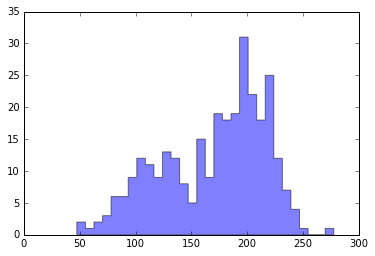

In [3]:
#Dataset:

data = np.loadtxt("data/mixture_data.csv", delimiter = ",")

plt.hist(data, bins = 30, histtype ="stepfilled", 
        alpha = 0.5);

This data looks bimodal. How could the data have been generated?

1. For each data point, choose cluster 1 with probability $p$, else choose cluster 2.
1. Draw a random variate from a normal distribution with parameters $\mu_i$ and $\sigma_i$ where $i$ was chosen in step 1.
1. Repeat.

We will need to infer or learn model parameters.

In [4]:
import pymc as pm

p = pm.Uniform("p", 0, 1)

assignment = pm.Categorical("assignment", [p, 1-p],
                           size = data.shape[0])

Variances of the two Normals seem different. We'll need to transform standard deviation to precision such that:

$\tau = \dfrac{1}{\sigma_2}$

In [6]:
taus = 1.0 / pm.Uniform("stds", 0, 100, size = 2)**2
centers = pm.Normal("centers", [120, 190], [0.01, 0.01], size =2)

@pm.deterministic
def center_i(assignment = assignment, centers = centers):
    return centers[assignment]

@pm.deterministic
def tau_i(assignment = assignment, taus=taus):
    return taus[assignment]

In [7]:
observations = pm.Normal("obs", center_i, tau_i, value = data,
                        observed = True)

model = pm.Model([p, assignment, observations, taus, centers])

mcmc = pm.MCMC(model)
mcmc.sample(50000)

 [-----------------100%-----------------] 50000 of 50000 complete in 21.1 sec

In [8]:
mcmc.sample(100000)

 [-----------------100%-----------------] 100000 of 100000 complete in 42.2 sec